# Yelp Restaurant Review Data Analysis

This notebook is for data cleaning and merging different datasets into one.

## Business.json Data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Columns that are used for the initial dataframe
cols = ['business_id', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'categories']

business_df = pd.read_csv('..\Yelp Dataset\yelp_business.csv', index_col='business_id', usecols=cols)

In [2]:
business_df.head()

,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,
FYWN1wneV18bWNgQjJ2GNg,Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,Dentists;General Dentistry;Health & Medical;Or...
He-G7vWjzVUysIKrfNbPUQ,McMurray,PA,15317,40.291685,-80.104900,3.0,11,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
KQPW8lFf1y5BT2MxiSZ3QA,Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,Departments of Motor Vehicles;Public Services ...
8DShNS-LuFqpEWIp0HxijA,Tempe,AZ,85282,33.383147,-111.964725,3.0,9,Sporting Goods;Shopping
PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [3]:
business_df.shape

(174567, 8)

In [4]:
business_df.describe(include='all')

,city,state,postal_code,latitude,longitude,stars,review_count,categories
count,174566,174566,173944,174566.000000,174566.000000,174567.000000,174567.000000,174567
unique,1093,67,16004,NaN,NaN,NaN,NaN,76419
top,Las Vegas,AZ,89109,NaN,NaN,NaN,NaN,Restaurants;Pizza
freq,26775,52214,2965,NaN,NaN,NaN,NaN,990
mean,NaN,NaN,NaN,38.627312,-92.679009,3.632196,30.137059,NaN
std,NaN,NaN,NaN,5.389012,26.240079,1.003739,98.208174,NaN
min,NaN,NaN,NaN,-36.086009,-142.466650,1.000000,3.000000,NaN
25%,NaN,NaN,NaN,33.631550,-112.125879,3.000000,4.000000,NaN
50%,NaN,NaN,NaN,36.144257,-89.410128,3.500000,8.000000,NaN
75%,NaN,NaN,NaN,43.606181,-79.657609,4.500000,23.000000,NaN


Because we are visualizing only restaurant review data, we want to extract observations that have Restaurants value in their category attribute.

In [5]:
business_df.categories.value_counts()

Restaurants;Pizza                                                                                                                  990
Pizza;Restaurants                                                                                                                  987
Food;Coffee & Tea                                                                                                                  978
Nail Salons;Beauty & Spas                                                                                                          936
Coffee & Tea;Food                                                                                                                  929
Beauty & Spas;Nail Salons                                                                                                          909
Mexican;Restaurants                                                                                                                906
Restaurants;Mexican                                    

In [6]:
# Matching 'Restaurants' string with categories attribute and extracting a new dataframe
restaurants_df = business_df[business_df['categories'].str.contains('Restaurants')]

In [7]:
restaurants_df.shape

(54618, 8)

In [8]:
restaurants_df.head()

,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,
PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New);Nightlife;Bars;Sandwiches;Ameri...
o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,BW,70567,48.727200,9.147950,4.0,5,Italian;Restaurants
XOSRcvtaKc_Q5H1SAzN20A,Houston,PA,15342,40.241548,-80.212815,4.5,3,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,Restaurants;American (Traditional)
l09JfMeQ6ynYs5MCJtrcmQ,Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,Italian;French;Restaurants


Inspecting the DF for missing and duplicate values

In [9]:
restaurants_df.isna().sum()

city              0
state             0
postal_code     101
latitude          0
longitude         0
stars             0
review_count      0
categories        0
dtype: int64

There are some missing values, but so few that we can drop them.

In [10]:
r_df_nona = restaurants_df.dropna(axis=0, how='any')
r_df_nona.isna().sum()

city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
categories      0
dtype: int64

In [11]:
r_df_nona[r_df_nona.duplicated()]

,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,
e8cFfRySb8n9lMXRnyzeIA,Charlotte,NC,28270,35.137593,-80.73942,3.0,7,Restaurants;Chinese


Only one duplicate value so we can drop it.

In [12]:
r_df = r_df_nona.drop_duplicates(keep='first')

In [13]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54516 entries, PfOCPjBrlQAnz__NXj9h_w to UdEmYOnk2iJDY9lpEPAlJQ
Data columns (total 8 columns):
city            54516 non-null object
state           54516 non-null object
postal_code     54516 non-null object
latitude        54516 non-null float64
longitude       54516 non-null float64
stars           54516 non-null float64
review_count    54516 non-null int64
categories      54516 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 3.7+ MB


We want to replace the Restaurants string in categories attribute, because it doesn't provide any additional information

In [14]:
r_df['categories'] = r_df['categories'].replace({';Restaurants' : '', 'Restaurants;' : '', 'Restaurants' : ''}, regex=True)

C:\Users\joona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
r_df.head()

,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,
PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New);Nightlife;Bars;Sandwiches;Ameri...
o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,BW,70567,48.727200,9.147950,4.0,5,Italian
XOSRcvtaKc_Q5H1SAzN20A,Houston,PA,15342,40.241548,-80.212815,4.5,3,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American (Traditional)
l09JfMeQ6ynYs5MCJtrcmQ,Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,Italian;French


Now we want to split the categories column by ";" character and add the first given category (the most important one) to the r_df.

In [16]:
r_df['category'] = r_df.categories.str.split(';').str[0]

# Drop the categories column from the dataframe
r_df_categorized = r_df.drop(columns='categories')
r_df_categorized.head()

C:\Users\joona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,state,postal_code,latitude,longitude,stars,review_count,category
business_id,,,,,,,,
PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New)
o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,BW,70567,48.727200,9.147950,4.0,5,Italian
XOSRcvtaKc_Q5H1SAzN20A,Houston,PA,15342,40.241548,-80.212815,4.5,3,Breakfast & Brunch
fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American (Traditional)
l09JfMeQ6ynYs5MCJtrcmQ,Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,Italian


In [17]:
# Count frequencies of different cuisines
r_df_categorized['category'].value_counts()

Pizza                           3387
Fast Food                       2847
Mexican                         2557
Chinese                         2538
Food                            2520
Italian                         2326
Sandwiches                      2300
American (Traditional)          2043
Burgers                         1825
Nightlife                       1568
Breakfast & Brunch              1496
Bars                            1487
American (New)                  1386
Japanese                        1159
Cafes                           1023
Sushi Bars                       907
Thai                             832
Seafood                          800
Indian                           799
Chicken Wings                    786
Barbeque                         671
Vietnamese                       647
Mediterranean                    623
Asian Fusion                     601
Delis                            582
Coffee & Tea                     582
Steakhouses                      564
C

In [18]:
# Let's pick 50 most frequent out of these and read them into a list

# Read all food categories to an list
food_categories_list = r_df_categorized['category'].value_counts().index.tolist()

# Select 50 most frequent cuisines and remove one empty (category with only Restaurant) and 'Event Planning and Services'
food_categories_50 = food_categories_list[0:52]
food_categories_50.remove('')
food_categories_50.remove('Event Planning & Services')
food_categories_50

['Pizza',
 'Fast Food',
 'Mexican',
 'Chinese',
 'Food',
 'Italian',
 'Sandwiches',
 'American (Traditional)',
 'Burgers',
 'Nightlife',
 'Breakfast & Brunch',
 'Bars',
 'American (New)',
 'Japanese',
 'Cafes',
 'Sushi Bars',
 'Thai',
 'Seafood',
 'Indian',
 'Chicken Wings',
 'Barbeque',
 'Vietnamese',
 'Mediterranean',
 'Asian Fusion',
 'Delis',
 'Coffee & Tea',
 'Steakhouses',
 'Canadian (New)',
 'Greek',
 'Salad',
 'French',
 'Diners',
 'Middle Eastern',
 'Korean',
 'Buffets',
 'Caribbean',
 'Bakeries',
 'Caterers',
 'Sports Bars',
 'Hot Dogs',
 'Desserts',
 'Vegetarian',
 'Specialty Food',
 'Pubs',
 'Tex-Mex',
 'German',
 'Latin American',
 'Soup',
 'Vegan',
 'Ice Cream & Frozen Yogurt']

In [19]:
# Filter rows of containing only these 50 most frequently used cuisines

r_df_clean = r_df_categorized[r_df_categorized['category'].isin(food_categories_50)]
r_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46406 entries, PfOCPjBrlQAnz__NXj9h_w to UdEmYOnk2iJDY9lpEPAlJQ
Data columns (total 8 columns):
city            46406 non-null object
state           46406 non-null object
postal_code     46406 non-null object
latitude        46406 non-null float64
longitude       46406 non-null float64
stars           46406 non-null float64
review_count    46406 non-null int64
category        46406 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 3.2+ MB


In [20]:
r_df_clean.describe(include='all')

,city,state,postal_code,latitude,longitude,stars,review_count,category
count,46406,46406,46406,46406.000000,46406.000000,46406.000000,46406.000000,46406
unique,732,40,8795,NaN,NaN,NaN,NaN,50
top,Toronto,ON,89109,NaN,NaN,NaN,NaN,Pizza
freq,5976,11440,748,NaN,NaN,NaN,NaN,3387
mean,NaN,NaN,NaN,40.165666,-86.170863,3.420786,58.659333,NaN
std,NaN,NaN,NaN,5.441554,27.020415,0.798343,150.564574,NaN
min,NaN,NaN,NaN,-34.515952,-142.466650,1.000000,3.000000,NaN
25%,NaN,NaN,NaN,35.247325,-111.929945,3.000000,7.000000,NaN
50%,NaN,NaN,NaN,41.237823,-80.841481,3.500000,18.000000,NaN
75%,NaN,NaN,NaN,43.704188,-79.393448,4.000000,54.000000,NaN


# Review.json Data

In [21]:
# Columns that are used for the initial dataframe
cols = ['review_id', 'user_id', 'business_id', 'stars', 'date']

review_df = pd.read_csv('..\Yelp Dataset\yelp_review.csv', index_col='review_id', usecols=cols)

In [22]:
review_df.head()

,user_id,business_id,stars,date
review_id,,,,
vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28
n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28
MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28
IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28
L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28


In [23]:
# Whole dataset has: 5261668 entries
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261668 entries, vkVSCC7xljjrAI4UGfnKEQ to ldsIs3sGXPJ7WM7VyAm4lQ
Data columns (total 4 columns):
user_id        object
business_id    object
stars          int64
date           object
dtypes: int64(1), object(3)
memory usage: 200.7+ MB


In [24]:
review_df.describe()

,stars
count,5.261668e+06
mean,3.727739e+00
std,1.433593e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [25]:
review_df[review_df.duplicated()]

,user_id,business_id,stars,date
review_id,,,,


In [26]:
review_df.isna().sum()

user_id        0
business_id    0
stars          0
date           0
dtype: int64

Dataset has no missing or duplicate values

## User.json Data

In [27]:
# Columns that are used for the initial dataframe
cols = ['user_id', 'review_count', 'yelping_since', 'fans', 'average_stars']

user_df = pd.read_csv('..\Yelp Dataset\yelp_user.csv', index_col='user_id', usecols=cols)

In [28]:
user_df.head()

,review_count,yelping_since,fans,average_stars
user_id,,,,
JJ-aSuM4pCFPdkfoZ34q0Q,10,2013-09-24,0,3.70
uUzsFQn_6cXDh6rPNGbIFA,1,2017-03-02,0,2.00
mBneaEEH5EMyxaVyqS-72A,6,2015-03-13,0,4.67
W5mJGs-dcDWRGEhAzUYtoA,3,2016-09-08,0,4.67
4E8--zUZO1Rr1IBK4_83fg,11,2012-07-16,0,3.45


In [29]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326100 entries, JJ-aSuM4pCFPdkfoZ34q0Q to q-1Tz4SvaTpGEMhI_xwm0Q
Data columns (total 4 columns):
review_count     1326100 non-null int64
yelping_since    1326100 non-null object
fans             1326100 non-null int64
average_stars    1326100 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 50.6+ MB


In [30]:
# No missing values
user_df.isna().sum()

review_count     0
yelping_since    0
fans             0
average_stars    0
dtype: int64

In [31]:
user_df.describe()

,review_count,fans,average_stars
count,1.326100e+06,1.326100e+06,1.326100e+06
mean,2.311717e+01,1.457274e+00,3.710841e+00
std,7.909808e+01,1.428609e+01,1.120721e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,0.000000e+00,3.090000e+00
50%,5.000000e+00,0.000000e+00,3.900000e+00
75%,1.500000e+01,0.000000e+00,4.610000e+00
max,1.195400e+04,7.009000e+03,5.000000e+00


## Merging DataFrames

Let's start merging by inspecting all dataframes and renaming columns that have conflicting names in different dataframes to avoid running into trouble later on

In [32]:
r_df_clean.rename(columns={'stars': 'restaurant_stars', 'review_count': 'restaurant_review_count'}, inplace=True)
r_df_clean.head()

C:\Users\joona\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,city,state,postal_code,latitude,longitude,restaurant_stars,restaurant_review_count,category
business_id,,,,,,,,
PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New)
o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,BW,70567,48.727200,9.147950,4.0,5,Italian
XOSRcvtaKc_Q5H1SAzN20A,Houston,PA,15342,40.241548,-80.212815,4.5,3,Breakfast & Brunch
fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American (Traditional)
l09JfMeQ6ynYs5MCJtrcmQ,Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,Italian


In [33]:
r_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46406 entries, PfOCPjBrlQAnz__NXj9h_w to UdEmYOnk2iJDY9lpEPAlJQ
Data columns (total 8 columns):
city                       46406 non-null object
state                      46406 non-null object
postal_code                46406 non-null object
latitude                   46406 non-null float64
longitude                  46406 non-null float64
restaurant_stars           46406 non-null float64
restaurant_review_count    46406 non-null int64
category                   46406 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 3.2+ MB


In [34]:
review_df.rename(columns={'stars': 'review_stars'}, inplace=True)
review_df.head()

,user_id,business_id,review_stars,date
review_id,,,,
vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28
n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28
MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28
IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28
L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28


In [35]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261668 entries, vkVSCC7xljjrAI4UGfnKEQ to ldsIs3sGXPJ7WM7VyAm4lQ
Data columns (total 4 columns):
user_id         object
business_id     object
review_stars    int64
date            object
dtypes: int64(1), object(3)
memory usage: 200.7+ MB


In [36]:
user_df.rename(columns={'review_count': 'user_review_count'}, inplace=True)
user_df.head()

,user_review_count,yelping_since,fans,average_stars
user_id,,,,
JJ-aSuM4pCFPdkfoZ34q0Q,10,2013-09-24,0,3.70
uUzsFQn_6cXDh6rPNGbIFA,1,2017-03-02,0,2.00
mBneaEEH5EMyxaVyqS-72A,6,2015-03-13,0,4.67
W5mJGs-dcDWRGEhAzUYtoA,3,2016-09-08,0,4.67
4E8--zUZO1Rr1IBK4_83fg,11,2012-07-16,0,3.45


In [37]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326100 entries, JJ-aSuM4pCFPdkfoZ34q0Q to q-1Tz4SvaTpGEMhI_xwm0Q
Data columns (total 4 columns):
user_review_count    1326100 non-null int64
yelping_since        1326100 non-null object
fans                 1326100 non-null int64
average_stars        1326100 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 50.6+ MB


As there are no missing values we can start merging by joining review_df and user_df on user_id. Using inner join we keep only users that have reviewed something and reviews on restaurants on the second join.

In [38]:
user_review_df = pd.merge(review_df, user_df, how='inner', left_on="user_id" , right_index= True)
user_review_df.head()

,user_id,business_id,review_stars,date,user_review_count,yelping_since,fans,average_stars
review_id,,,,,,,,
vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,6,2015-12-22,0,4.67
n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,6,2015-12-22,0,4.67
MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,6,2015-12-22,0,4.67
IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,6,2015-12-22,0,4.67
L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,6,2015-12-22,0,4.67


In [39]:
user_review_df.tail()

,user_id,business_id,review_stars,date,user_review_count,yelping_since,fans,average_stars
review_id,,,,,,,,
PoGSiNz1X5SUu0qEt-qM5w,mPjPyipaD0C_myqWqDipZg,Ngk84Ax1tXgpoJFEGxot3w,1,2011-11-21,30,2011-10-18,1,2.74
-CJNPrDWgIkorx4iEZJXIg,mPjPyipaD0C_myqWqDipZg,pOEL97ld-FJMKO8Ki8JmYg,3,2016-04-30,30,2011-10-18,1,2.74
W9eVvOcpBvG6lpJPoJOxuA,mPjPyipaD0C_myqWqDipZg,5ubokMNw8qfbX2WtxgJG1Q,4,2011-10-23,30,2011-10-18,1,2.74
hqQ1UTFKMN2P1ezUow48OQ,mPjPyipaD0C_myqWqDipZg,EO3i5kTUG7_S2OIQ23sdSA,3,2011-11-07,30,2011-10-18,1,2.74
ldsIs3sGXPJ7WM7VyAm4lQ,mPjPyipaD0C_myqWqDipZg,HloEEXm_QzEpycuwA_RtQA,3,2011-11-15,30,2011-10-18,1,2.74


In [40]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261662 entries, vkVSCC7xljjrAI4UGfnKEQ to ldsIs3sGXPJ7WM7VyAm4lQ
Data columns (total 8 columns):
user_id              object
business_id          object
review_stars         int64
date                 object
user_review_count    int64
yelping_since        object
fans                 int64
average_stars        float64
dtypes: float64(1), int64(3), object(4)
memory usage: 361.3+ MB


In [41]:
user_review_df.describe()

,review_stars,user_review_count,fans,average_stars
count,5.261662e+06,5.261662e+06,5.261662e+06,5.261662e+06
mean,3.727738e+00,1.216500e+02,1.099750e+01,3.737311e+00
std,1.433593e+00,3.413802e+02,5.060646e+01,7.826569e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,7.000000e+00,0.000000e+00,3.400000e+00
50%,4.000000e+00,2.400000e+01,0.000000e+00,3.800000e+00
75%,5.000000e+00,9.700000e+01,4.000000e+00,4.200000e+00
max,5.000000e+00,1.195400e+04,7.009000e+03,5.000000e+00


In [42]:
user_review_df.isna().sum()

user_id              0
business_id          0
review_stars         0
date                 0
user_review_count    0
yelping_since        0
fans                 0
average_stars        0
dtype: int64

Now we can join user_reviews_df with r_df_clean (containing restaurant information) on business_id to form the final data frame

In [43]:
final_df = pd.merge(user_review_df, r_df_clean, how='inner', left_on="business_id" , right_index= True)
final_df.head()

,user_id,business_id,review_stars,date,user_review_count,yelping_since,fans,average_stars,city,state,postal_code,latitude,longitude,restaurant_stars,restaurant_review_count,category
review_id,,,,,,,,,,,,,,,,
vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,6,2015-12-22,0,4.67,Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners
vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,177,2015-02-15,30,3.41,Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners
jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,40,2017-01-16,1,3.98,Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners
SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,79,2011-04-14,8,4.52,Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners
oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,3,2008-05-29,0,4.00,Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners


In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2722485 entries, vkVSCC7xljjrAI4UGfnKEQ to 99hWXPtbpzXXbsL43RYuKA
Data columns (total 16 columns):
user_id                    object
business_id                object
review_stars               int64
date                       object
user_review_count          int64
yelping_since              object
fans                       int64
average_stars              float64
city                       object
state                      object
postal_code                object
latitude                   float64
longitude                  float64
restaurant_stars           float64
restaurant_review_count    int64
category                   object
dtypes: float64(4), int64(4), object(8)
memory usage: 353.1+ MB


In [45]:
final_df.isna().sum()

user_id                    0
business_id                0
review_stars               0
date                       0
user_review_count          0
yelping_since              0
fans                       0
average_stars              0
city                       0
state                      0
postal_code                0
latitude                   0
longitude                  0
restaurant_stars           0
restaurant_review_count    0
category                   0
dtype: int64

In [46]:
final_df[final_df.duplicated()].count()

user_id                    0
business_id                0
review_stars               0
date                       0
user_review_count          0
yelping_since              0
fans                       0
average_stars              0
city                       0
state                      0
postal_code                0
latitude                   0
longitude                  0
restaurant_stars           0
restaurant_review_count    0
category                   0
dtype: int64

In [50]:
final_df.shape

(2722485, 16)

## Variable distributions and outliers

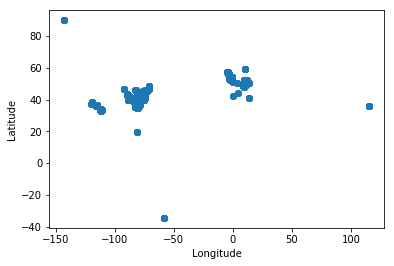

In [52]:
df = final_df

# Let's start with latitude and longitude to limit geographical area if possible

'''The valid range of latitude in degrees is -90 and +90 for the southern and northern hemisphere respectively.
Longitude is in the range -180 and +180 specifying coordinates west and east of the Prime Meridian, respectively.'''

plt.scatter(df['longitude'], df['latitude'])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

We can see that all values fit in to the valid ranges of latitude and longitude, but there seems to be some "outliers". Let's explore them and see if they make sense to keep.

In [53]:
df[df['latitude'] < -30]['business_id'].value_counts()

sImzZLPpBMqFq7AX4S-wvw    25
Ss6J7HFhMCxoq7M8wXqc8A    16
Y23VrXVc75Pv15Z9Bw1R6w    11
bGxzQDGOTpab_6hdqsqv9g     8
KNyDf8u8nd0Qs8HmqSk6Og     8
4-xLjGavuWFqEfNuznxL3A     5
-mkmQnY__U4xnjj5v2vRyQ     4
softZjpREG65wpAns2FaWA     4
i1e8KsIy1ELvI7G6mvvZkw     3
zMAiU0s8ScUYHwAESCB8Qg     3
YBaWP2r64BPJazkmyf1fig     3
Name: business_id, dtype: int64

In this group, there are only 90 reviews (compare to 2,7 million in the whole dataset so these can be removed due to small size.

In [54]:
df = df.drop(df[df['latitude'] < -30].index)
df.shape

(2722395, 16)

In [55]:
df[df['latitude'] > 80]['business_id'].value_counts()

1yQUqh3_h1IOrXZmb4CBFw    15
Name: business_id, dtype: int64

Only 15 reviews so we can drop this also

In [56]:
df = df.drop(df[df['latitude'] > 80].index)
df.shape

(2722380, 16)

In [57]:
df[df['longitude'] > 100]['business_id'].value_counts()

Zmp2_b2gpSloz4Dv2VsVNg    71
Name: business_id, dtype: int64

Same thing here

In [58]:
df = df.drop(df[df['longitude'] > 100].index)
df.shape

(2722309, 16)

In [59]:
df[df['latitude'] < 20]['business_id'].value_counts()

vBxK_MAGuy8eWL_CCfUCUQ    5
Name: business_id, dtype: int64

Same here

In [60]:
df = df.drop(df[df['latitude'] < 20].index)
df.shape

(2722304, 16)

Now we can make the scatter plot again

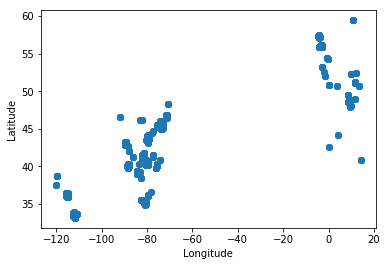

In [62]:
plt.scatter(df['longitude'], df['latitude'])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

Makes more sense now, geographical areas are closer to each other

### Exploring distributions of numerical variables

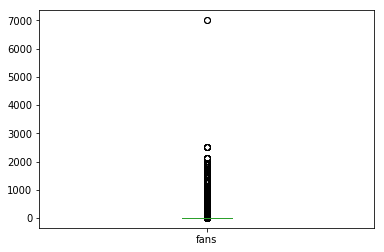

In [63]:
df['fans'].plot(kind='box')
plt.show()

In [65]:
df[df['fans'] > 6000]

,user_id,business_id,review_stars,date,user_review_count,yelping_since,fans,average_stars,city,state,postal_code,latitude,longitude,restaurant_stars,restaurant_review_count,category
review_id,,,,,,,,,,,,,,,,
YmVAQJK2dke4xaQJne5Ofg,37cpUoM8hlkSQfReIEBd-Q,0qet57CmMA5qUm6gPFUTpg,2,2014-12-30,1477,2009-04-25,7009,4.23,Las Vegas,NV,89109,36.115274,-115.172738,2.5,114,Italian
qn_5DSdHyazKJuldOYO21g,37cpUoM8hlkSQfReIEBd-Q,lYCeqldIiOggsbByH3RRhw,3,2015-01-13,1477,2009-04-25,7009,4.23,Las Vegas,NV,89119,36.080900,-115.139103,2.5,15,Pizza


In [66]:
# Only one user differs greatly from others so we can remove that observation.
df = df.drop(df[df['fans'] > 6000].index)
df.shape

(2722302, 16)

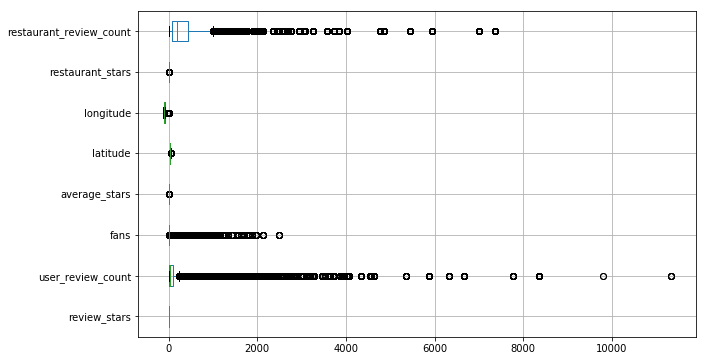

In [67]:
df.boxplot(vert=False, figsize=(10,6))
plt.show()

All "outliers" off boxplot make sense in this domain so we can assume there are no real outliers left in the dataframe

Plotting histograms of numerical variables with seaborn

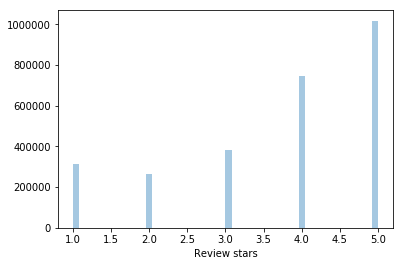

In [79]:
ax = sns.distplot(df['review_stars'], kde=False, axlabel='Review stars')

In [76]:
df[df['category'] == 'Pizza'].describe()

,review_stars,user_review_count,fans,average_stars,latitude,longitude,restaurant_stars,restaurant_review_count
count,124402.000000,124402.000000,124402.000000,124402.000000,124402.000000,124402.000000,124402.000000,124402.000000
mean,3.617016,107.338097,9.001222,3.679925,37.291286,-100.277530,3.619705,314.725125
std,1.433126,289.422273,42.014037,0.784616,4.016287,19.306856,0.648711,663.307604
min,1.000000,0.000000,0.000000,1.000000,33.137390,-115.350952,1.000000,3.000000
25%,3.000000,8.000000,0.000000,3.330000,33.619772,-115.111688,3.500000,40.000000
50%,4.000000,24.000000,0.000000,3.770000,36.106520,-111.926224,4.000000,120.000000
75%,5.000000,85.000000,3.000000,4.140000,40.464752,-80.851277,4.000000,286.000000
max,5.000000,8353.000000,2499.000000,5.000000,57.481913,14.092636,5.000000,3741.000000


In [78]:
df[df['category'] == 'Italian'].describe()

,review_stars,user_review_count,fans,average_stars,latitude,longitude,restaurant_stars,restaurant_review_count
count,120653.000000,120653.000000,120653.000000,120653.000000,120653.000000,120653.000000,120653.000000,120653.000000
mean,3.725950,110.603284,9.339096,3.727547,37.990691,-96.764744,3.723355,318.151070
std,1.358676,298.285415,44.536380,0.733996,4.746329,25.155699,0.532056,431.970855
min,1.000000,0.000000,0.000000,1.000000,33.220008,-115.333614,1.000000,3.000000
25%,3.000000,8.000000,0.000000,3.400000,33.638322,-115.136026,3.500000,59.000000
50%,4.000000,25.000000,0.000000,3.790000,36.115059,-111.906005,4.000000,164.000000
75%,5.000000,90.000000,3.000000,4.160000,41.508884,-79.975133,4.000000,384.000000
max,5.000000,8353.000000,1962.000000,5.000000,59.436505,11.770300,5.000000,2349.000000


## Data output

There are no missing or duplicated values nor outliers. Let's store DataFrame in both csv and json formats

In [80]:
df.to_csv('..\Yelp Dataset\clean_data.csv')

In [81]:
df.to_json('..\Yelp Dataset\clean_data.json')